In [1]:
# 載入需要的套件
import os
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 仿造之前做過的處理

In [2]:
# 設定 data_path
dir_data = 'C:/Users/user/Desktop/AI馬拉松-講義&範例/D47-D50/D48 data/'
f_app_train = os.path.join(dir_data, 'train(feature+label).csv')
f_app_test = os.path.join(dir_data, 'test.csv')

# 讀取檔案
app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

In [3]:
train_labels = app_train['Solution']
train_labels

0      1
1      0
2      0
3      1
4      0
      ..
995    0
996    1
997    1
998    0
999    0
Name: Solution, Length: 1000, dtype: int64

In [4]:
from sklearn.preprocessing import MinMaxScaler

# 特徵欄位清單
train = app_train.drop(columns=['Solution'])
features = list(train.columns)

# 複製 test 資料
test = app_test.copy()
test = test.drop(columns=['Solution'])

# 縮放器 : 設定特徵縮放到 0~1 區間
scaler = MinMaxScaler(feature_range = (0, 1))

# 縮放器載入 train 的上下限, 對 train, test 進行縮放轉換
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (1000, 40)
Testing data shape:  (9000, 40)


### Fit the model

In [5]:
from sklearn.ensemble import RandomForestClassifier

# 設定模型與模型參數
clf = RandomForestClassifier(max_depth=2, random_state=0)

# 使用 Train 資料訓練模型
clf.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [6]:
# 用模型預測結果

clf = clf.predict(test)[:,]
clf 

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

### 儲存預測結果

In [7]:
# 計算提交結果
submit = app_test
submit['Solution'] = clf
submit = submit['Solution']

submit.head()

0    1
1    0
2    0
3    0
4    0
Name: Solution, dtype: int64

In [8]:
submit.to_csv('lee2nd116.csv',index=False)

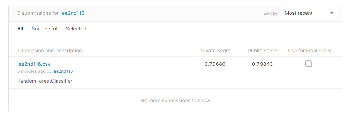

In [9]:
import matplotlib.pyplot as plt # plt 用於顯示圖片
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import numpy as np

lee2nd116 = mpimg.imread('1.png') 

plt.imshow(lee2nd116) # 顯示圖片
plt.axis('off') # 不顯示座標軸
plt.show()